<a href="https://colab.research.google.com/github/anayanz1Mh/ComputoEvolutivo/blob/main/Octubre_Diagramas_de_cuadricula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

**Definición.** Un diagrama de cuadrícula plano $\tilde{\Gamma}$ consiste en una cuadrícula de $n\times n$ celdas junto con una colección de puntos blancos y negros tales que:

* Cada renglón contiene exactamente un punto blanco y un punto negro.
*   Cada columna contiene exactamente un punto blanco y un punto negro.
*   Ninguna celda contiene más de un punto.

**Definición.** Al número $n$ lo conocemos como el número de cuadrícula de $\tilde{\Gamma}$.

**Construcción.** Construimos una proyección plana de un nudo dibujando segmentos horizontales desde el punto blanco hasta el punto negro en cada renglón y un segmento vertical desde el punto negro al punto blanco en cada columna.

En cada punto de intersección, dejamos la línea horizontal por debajo de la línea vertical.

Esta construcción produce una proyección de un lazo orientado $\vec{L}$ en $S^3$. (Manolescu, 2009)

# Bibliotecas

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Clase diagrama

In [ ]:
class Diagrama:
    def __init__(self, n, tensor):
        """
        Constructor de la clase Diagrama
        recibe el tamaño del tensor y el tensor
        """
        self.n = n
        #0: nada; 1: negros; 2: blancos
        self.matriz = tensor
        #print(self.matriz)


    def Camino(self):
      camino = []
      visitados = set()
      #Primer elemento visitado
      fila = 0
      columna = torch.where(self.matriz[0] == 1)[0].item()
      #Agrego a arreglo y a conjunto
      camino.append((fila, columna))
      visitados.add((fila, columna))

      while True:
          # Busca la siguiente fila
          for fila_ in range(0, self.n):
              if self.matriz[fila_][columna].item() == 2:
                  fila = fila_
                  break
          # Verificar si el nuevo nodo actual ya ha sido visitado
          if (fila, columna) in visitados:
            break

          camino.append((fila, columna))
          visitados.add((fila, columna))

          # Busca la siguiente columna
          columna = torch.where(self.matriz[fila] == 1)[0].item()

          # Verificar si el nodo actual ya ha sido visitado
          if (fila, columna) in visitados:
            break
          camino.append((fila, columna))
          visitados.add((fila, columna))

      return camino

      ################################################################################

    def realizacionCaminos(self, Mostrar, Guardar, Nombre):
        """
        Realiza la versión gráfica del diagrama
        """
        # Definir los límites de la retícula
        n = self.n
        x_min, x_max = 0, self.n
        y_min, y_max = 0, self.n

        # Crear una figura y ejes
        fig, ax = plt.subplots()

        # Dibujar la retícula
        ax.set_xticks(range(x_min, x_max + 1))
        ax.set_yticks(range(y_min, y_max + 1))
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Dibujar círculos en cada celda de la retícula
        camino = self.Camino()
        i = 0
        for vertice in camino:
          x = camino[i][0]
          y = camino[i][1]

          if i%2 == 0:
            color_ = 'black'
          if i%2 == 1:
            color_ = 'blue'

          circle = Circle((x+0.5, y+0.5), 0.1, color=color_ )  # Círculo en el centro de cada celda
          ax.add_patch(circle)
          i = i+1

        # Dibuja las líneas
        i = 1
        m = len(camino)
        for i in range(m):
          x1, y1 = camino[i][0], camino[i][1]
          x2, y2 = camino[ (i+1) %m][0], camino[ (i+1) %m ][1]
          if i%2 == 0:
            color_ = 'purple'
          else:
            color_ = 'mediumturquoise'

          plt.plot([x1 + 0.5, x2 + 0.5], [y1 + 0.5, y2 + 0.5], color= color_)
          #Dirección
          dx = x2 - x1
          dy = y2 - y1
          plt.arrow(x1 + 0.5, y1 + 0.5, dx*0.3, dy*0.3, head_width=0.2, head_length=0.2, fc=color_, ec=color_)

        # Mostrar la retícula con círculos
        plt.xlim(0, n)
        plt.ylim(0, n)
        plt.gca().set_aspect('equal', adjustable='box')
        if Guardar:
          plt.savefig('/content/drive/My Drive/Diagramas/'+Nombre)
        if Mostrar:
          plt.show()
        plt.close()


# Verificar tensor

In [ ]:
def verificar_tensor(tensor):
    n =  tensor.shape[0]
    for fila in tensor:
        # Verificar que cada fila contenga exactamente una entrada con valor igual a 1
        if (fila == 1).sum().item() != 1:
            return False
        # Verificar que cada fila contenga exactamente una entrada con valor igual a 1
        if (fila == 2).sum().item() != 1:
            return False
        if (fila == 0).sum().item() != (n-2):
            return False
    for fila in tensor.T:
        # Verificar que cada fila contenga exactamente una entrada con valor igual a 1
        if (fila == 1).sum().item() != 1:
            return False
        # Verificar que cada fila contenga exactamente una entrada con valor igual a 1
        if (fila == 2).sum().item() != 1:
            return False
        if (fila == 0).sum().item() != (n-2):
            return False
    return True

## Ejemplos caminos válidos

In [ ]:
# Ejemplo de un tensor válido
tensor_1 = torch.tensor([[2, 1, 0],
                               [1, 0, 2],
                               [0, 2, 1]])
print("El tensor válido es:", verificar_tensor(tensor_1))


# Ejemplo de un tensor no válido (contiene más de una entrada con valor 1 en la primera fila)
tensor_2 = torch.tensor([[2, 1, 0, 0],
                          [0, 2, 1, 0],
                          [0, 0, 2, 1],
                            [2, 1, 0, 0]])

print("El tensor válido es:", verificar_tensor(tensor_2))


# Ejemplo de un tensor no válido (contiene más de una entrada con valor 1 en la primera fila)
tensor_3 = torch.tensor([[2, 1, 0, 0],
                         [0, 2, 1, 0],
                         [0, 0, 2, 1],
                         [1, 0, 0, 2]])
print("El tensor válido es:", verificar_tensor(tensor_3))

#Ejemplo de nudo cerrado
matriz_2 = np.array([ [1,2,0,0],
                      [0,1,0,2],
                      [0,0,2,1],
                      [2,0,1,0]] ) #Entradas

tensor_2 = torch.tensor(matriz_2)
print("El tensor válido es:", verificar_tensor(tensor_2))



El tensor válido es: True
El tensor válido es: False
El tensor válido es: True
El tensor válido es: True


# Genera combinaciones

In [ ]:
#Biblioteca necesaria para generar las combinaciones
import itertools

In [ ]:
def genera_combinaciones(n):
    #Genera un vector de la forma [1, 2, 0, ... ,]
    #Crea todas las permutaciones de ese vector
    vector = [0]*n
    vector[0]=1
    vector[1]=2
    return set(itertools.permutations(vector))

In [ ]:
def Primer_Filtro(n):
  #Primer filro
  m = []
  conjunto_combinaciones = genera_combinaciones(n)
  candidatos = list(itertools.product(conjunto_combinaciones, repeat=n)) #Producto cartesiano
  for c in candidatos:
    # Verifica que sea cerrado
    if verificar_tensor(torch.tensor(c)):
      m.append(c)
  return m #Regresa arreglos


In [ ]:
Candidatos_3 = Primer_Filtro(n=3)
print('Hay {} candidatos para ser nudos cerrados'.format(len(Candidatos_3)))
#for a in Candidatos_3:
#  print(a)

Hay 12 candidatos para ser nudos cerrados


In [ ]:
#Convirtiéndolos a diagramas
def convierte_a_diagramas(Candidatos, n):
  diagramas_ = []
  no_diagramas_ = []

  for a in Candidatos:
    tensor_ = torch.tensor( np.array(a) )#Entradas
    diagrama_ = Diagrama(n, tensor_)
    camino_ = diagrama_.Camino()
    #print('len camino', len (camino_))
    if len(camino_) == 2*n:
      diagramas_.append(a)
    else:
      no_diagramas_.append(a)
  return diagramas_, no_diagramas_

# Preparando el drive

In [ ]:
#Para poder manipular drive
import os

In [ ]:
# Hacer conexión al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Debe existir la ruta MyDrive/Diagramas
os.chdir('/content/drive/MyDrive/Diagramas')

In [ ]:
#Comprobando el contenido de /Digramas en dónde estoy
!ls

3  3-Diagramas.txt  3-regiones	4  4-Diagramas.txt  5  5-Diagramas.txt


## Diagramas con $n=3$

In [ ]:
#Realiza los diagramas y los guarda en drive
n=3
Candidatos_3 = Primer_Filtro(n)
D = convierte_a_diagramas(Candidatos_3, n)
diagramas_ = D[0]
no_diagramas_ = D[1]
print('Cantidad de diagramas de 3x3', len(diagramas_))
print('Cantidad de no diagramas de 3x3', len(no_diagramas_))

i=0
lista_diagramas = [] #Lista para guardar la información producida
for a in diagramas_:
  nombre = '3/3_diagrama_{}.png'.format(i)
  i+=1
  diagrama_ = Diagrama(n=n, tensor=torch.tensor(np.array(a)) )
  diagrama_.realizacionCaminos(Mostrar = False, Guardar = False, Nombre = nombre)
  lista_diagramas.append(diagrama_.matriz)


#Guardar los diagramas en un archivo txt
# Abrir un archivo de texto para escribir
with open('3-Diagramas.txt', 'w') as f:
    for i, tensor in enumerate(lista_diagramas):
        # Convertir cada tensor a numpy y luego a string
        tensor_str = str(tensor.numpy())

        # Escribir en el archivo, incluyendo el número de tensor
        f.write(f"{i+1}: {tensor_str}\n")


Cantidad de diagramas de 3x3 12
Cantidad de no diagramas de 3x3 0


## Diagramas con $n=4$

In [ ]:
#Realiza los diagramas y los guarda en drive
n=4
Candidatos_ = Primer_Filtro(n)
D = convierte_a_diagramas(Candidatos_, n)
diagramas_ = D[0]
no_diagramas_ = D[1]
print('Cantidad de diagramas de 4x4', len(diagramas_))
print('Cantidad de no diagramas de 4x4', len(no_diagramas_))

i=0
lista_diagramas = []

for a in diagramas_:
  nombre = '4/4_diagrama_{}.png'.format(i)
  i+=1
  diagrama_ = Diagrama(n=n, tensor=torch.tensor(np.array(a)) )
  diagrama_.realizacionCaminos(Mostrar = False, Guardar = True, Nombre = nombre)
  lista_diagramas.append(diagrama_.matriz)


#Guardar los diagramas en un archivo txt
with open('4-Diagramas.txt', 'w') as f:
    for i, tensor in enumerate(lista_diagramas):
        # Convertir cada tensor a numpy y luego a string
        tensor_str = str(tensor.numpy())

        # Escribir en el archivo, incluyendo el número de tensor
        f.write(f"{i+1}: {tensor_str}\n")


Cantidad de diagramas de 4x4 144
Cantidad de no diagramas de 4x4 72


In [ ]:
for a in no_diagramas_:
  diagrama_ = Diagrama(n, torch.tensor(np.array(a)) )
  diagrama_.realizacionCaminos()

##Diagramas con $n=5$

In [ ]:
#Realiza los diagramas y los guarda en drive
n = 5
Candidatos_ = Primer_Filtro(n)
D = convierte_a_diagramas(Candidatos_, n)
diagramas_ = D[0]
no_diagramas_ = D[1]
print('Cantidad de diagramas de 5x5', len(diagramas_))
print('Cantidad de no diagramas de 5x5', len(no_diagramas_))

i=0
for a in diagramas_:
  nombre = '5/diagrama_{}.png'.format(i)
  i+=1
  diagrama_ = Diagrama(n=n, tensor=torch.tensor(np.array(a)) )
  diagrama_.realizacionCaminos(Mostrar = False, Guardar = True, Nombre = nombre)
  lista_diagramas.append(diagrama_.matriz)


#Guardar los diagramas en un archivo txt
with open('5-Diagramas.txt', 'w') as f:
    for i, tensor in enumerate(lista_diagramas):
        # Convertir cada tensor a numpy y luego a string
        tensor_str = str(tensor.numpy())

        # Escribir en el archivo, incluyendo el número de tensor
        f.write(f"{i+1}: {tensor_str}\n")



Cantidad de diagramas de 5x5 2880
Cantidad de no diagramas de 5x5 2400


# Casos n=6, n=7, n=8

## Diagramas n=6

In [ ]:
#Realiza los diagramas y los guarda en drive
n = 6
Candidatos_ = Primer_Filtro(n)
D = convierte_a_diagramas(Candidatos_, n)
diagramas_ = D[0]
no_diagramas_ = D[1]
print('Cantidad de diagramas de 6x6', len(diagramas_))
print('Cantidad de no diagramas de 6x6', len(no_diagramas_))

cantidad_diagramas = len(diagramas_)
cantidad_no_diagramas = len(no_diagramas_)

# Guardamos en archivo la información de la cantidad de diagramas
with open('cantidad_diagramas_6x6.txt', 'w') as file:
    # Escribimos la cantidad en el archivo
    file.write(f'Cantidad de diagramas de 6x6: {cantidad_diagramas}\n')
    file.write(f'Cantidad de no diagramas de 6x6: {cantidad_no_diagramas}\n')

print('Archivo creado exitosamente.')

# Guarda la info de cada tensor
with open('diagramas_6x6.txt', 'w') as file:
    for tensor in diagramas_:
        # Convertimos el tensor a cadena y lo escribimos en el archivo
        file.write(str(tensor) + '\n\n')  # Cada tensor en un renglón separado por un doble salto de línea


# Ejemplos particulares

### Ejemplo $n=5$, Treefoil

tensor([[0, 1, 0, 0, 2],
        [2, 0, 1, 0, 0],
        [0, 2, 0, 1, 0],
        [0, 0, 2, 0, 1],
        [1, 0, 0, 2, 0]])
El camino tiene tamaño 10
[(0, 1), (2, 1), (2, 3), (4, 3), (4, 0), (1, 0), (1, 2), (3, 2), (3, 4), (0, 4)]


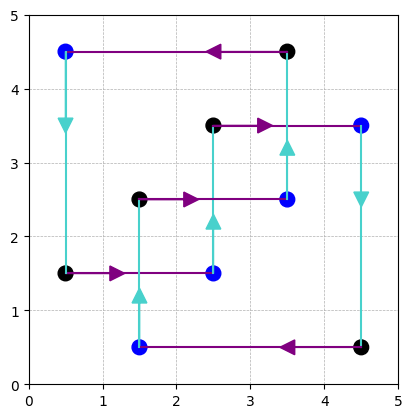

In [ ]:
n = 5  # Tamaño de la matriz
matriz = np.array([ [0,1,0,0,2],
                    [2,0,1,0,0],
                    [0,2,0,1,0],
                    [0,0,2,0,1],
                    [1,0,0,2,0]] ) #Entradas

tensor_1 = torch.tensor(matriz)
diagrama_1 = Diagrama(n, tensor_1)
camino_1 = diagrama_1.Camino()
print('El camino tiene tamaño {}'.format(len(camino_1)))
print(camino_1)

#Realización
diagrama_1.realizacionCaminos()

### Ejemplo $n=2$, Ciclo

El camino tiene tamaño 4
[(0, 1), (1, 1), (1, 0), (0, 0)]


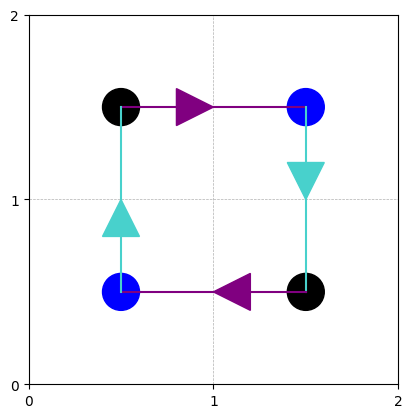

In [ ]:
n = 2  # Tamaño de la matriz
matriz_2 = np.array([ [2,1],
                    [1,2]] ) #Entradas

tensor_2 = torch.tensor(matriz_2)
diagrama_2 = Diagrama(n, tensor_2)
camino_2 = diagrama_2.Camino()
print('El camino tiene tamaño {}'.format(len(camino_2)))
print(camino_2)

#Realización
archivo = diagrama_2.realizacionCaminos()



### Ejemplo $n=4$, Ciclo

tensor([[1, 2, 0, 0],
        [0, 1, 0, 2],
        [0, 0, 2, 1],
        [2, 0, 1, 0]])
El camino tiene tamaño 8
[(0, 0), (3, 0), (3, 2), (2, 2), (2, 3), (1, 3), (1, 1), (0, 1)]


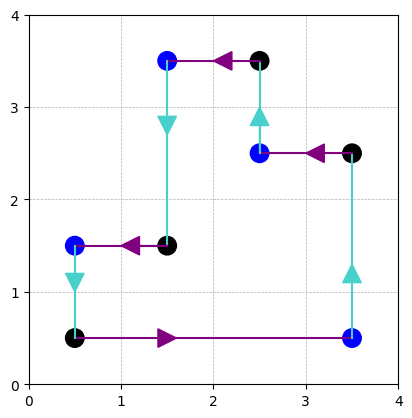

In [ ]:
n = 4  # Tamaño de la matriz
matriz_4 = np.array([ [1,2,0,0],
                      [0,1,0,2],
                      [0,0,2,1],
                      [2,0,1,0]] ) #Entradas

tensor_4 = torch.tensor(matriz_4)
diagrama_4 = Diagrama(n, tensor_4)
camino_4 = diagrama_4.Camino()
print('El camino tiene tamaño {}'.format(len(camino_4)))
print(camino_4)

#Realización
diagrama_4.realizacionCaminos()


In [ ]:
i=0
for i in range(0,10):
  if i==100:
    print('hola')
else:
  print('adios')

adios


# Referencias


*   Manolescu, Ciprian, et al. “A Combinatorial Description of Knot Floer Homology.” Annals of Mathematics, vol. 169, no. 2, 2009, pp. 633–60. JSTOR, http://www.jstor.org/stable/40345454. Accessed 10 Sept. 2024.




# Notas

**última revisión: 10 septiembre 2024**

*   Caso n=6, crashea por falta de RAM en T4 GPU

